   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x480 3 persons, 1 bus, 353.2ms
Speed: 19.5ms preprocess, 353.2ms inference, 33.8ms postprocess per image at shape (1, 3, 640, 480)


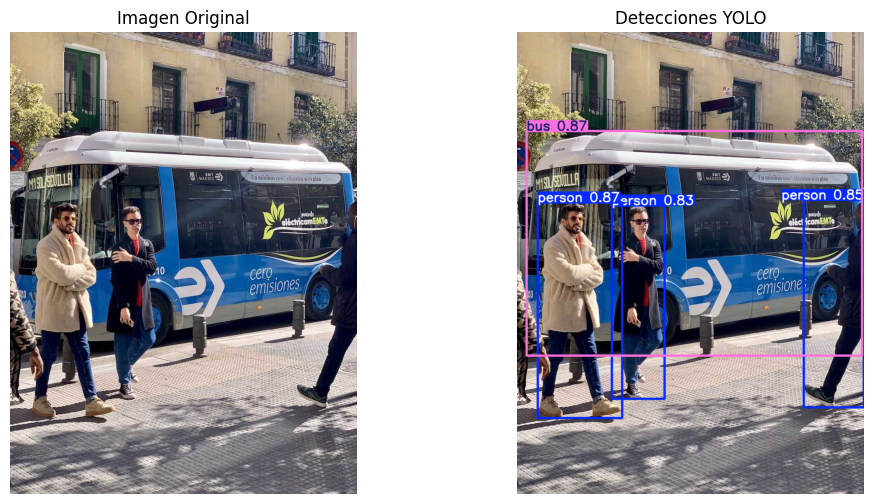

In [1]:
!pip install ultralytics opencv-python matplotlib

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Cargar un modelo YOLO preentrenado en COCO
model = YOLO("yolov8n.pt")

# Cargar una imagen de prueba desde URL
image_url = "https://ultralytics.com/images/bus.jpg"
resp = urllib.request.urlopen(image_url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Realizar predicción
results = model.predict(source=image, conf=0.5, iou = 0.5)

# Obtener imagen con detecciones
res_plotted = results[0].plot()

# Mostrar imagen original y con detecciones
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

# Imagen con detecciones
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.title("Detecciones YOLO")
plt.axis("off")

plt.show()